In [44]:
# 1. Importing Libraries and Loading Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [45]:
# Ensure reproducibility
np.random.seed(42)

# Load the dataset
data = pd.read_csv('MBA.csv')



Dataset Preview:
    application_id  gender  international   gpa       major      race  gmat  \
0               1  Female          False  3.30    Business     Asian   620   
1               2    Male          False  3.28  Humanities     Black   680   
2               3  Female           True  3.30    Business       NaN   710   
3               4    Male          False  3.47        STEM     Black   690   
4               5    Male          False  3.35        STEM  Hispanic   590   

   work_exp          work_industry admission  
0         3     Financial Services     Admit  
1         5  Investment Management       NaN  
2         5             Technology     Admit  
3         6             Technology       NaN  
4         5             Consulting       NaN  

Summary Statistics:
         application_id gender international         gpa       major   race  \
count       499.000000    499           499  499.000000         499    372   
unique             NaN      2             2         

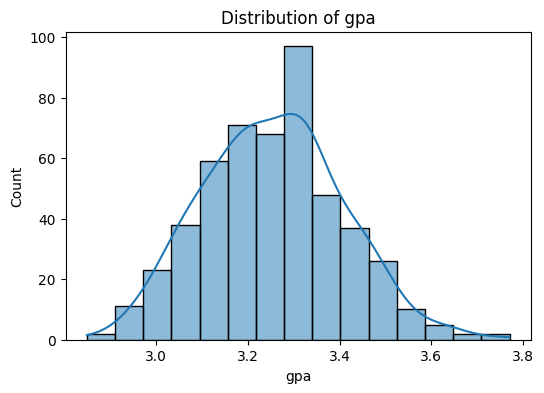

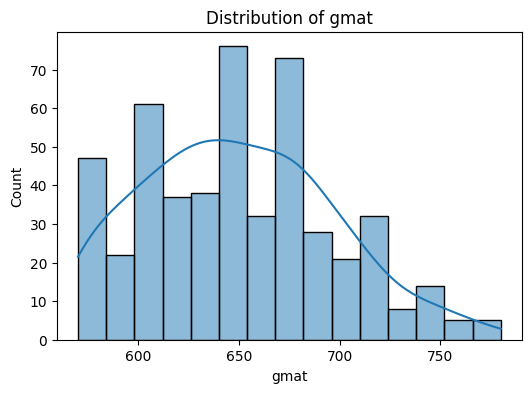

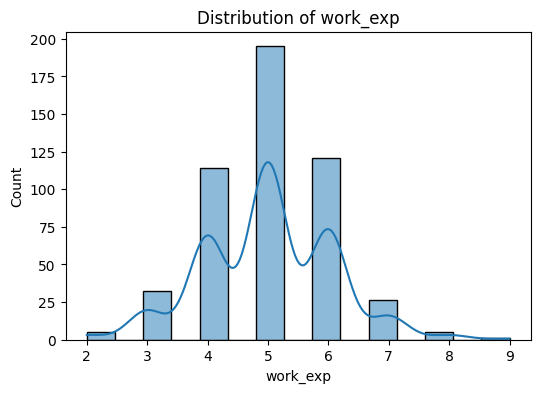

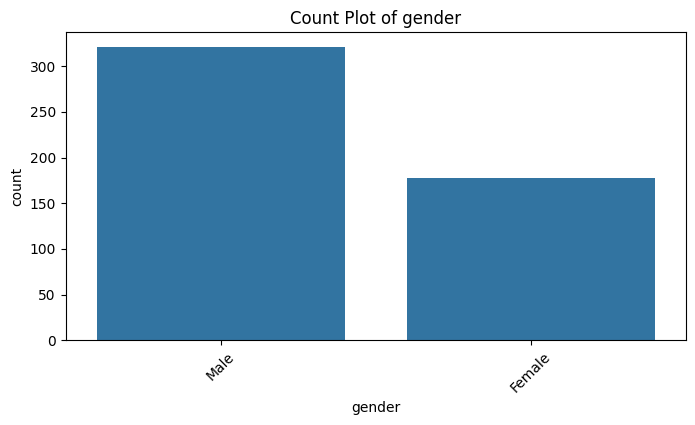

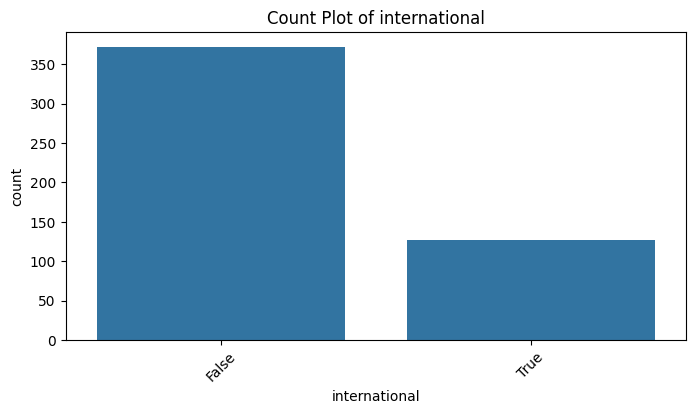

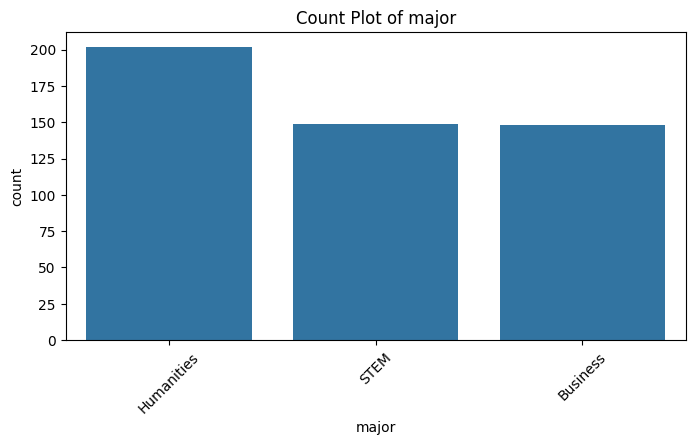

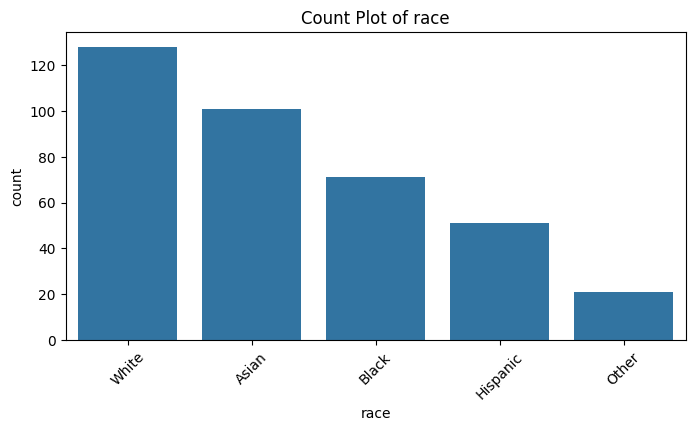

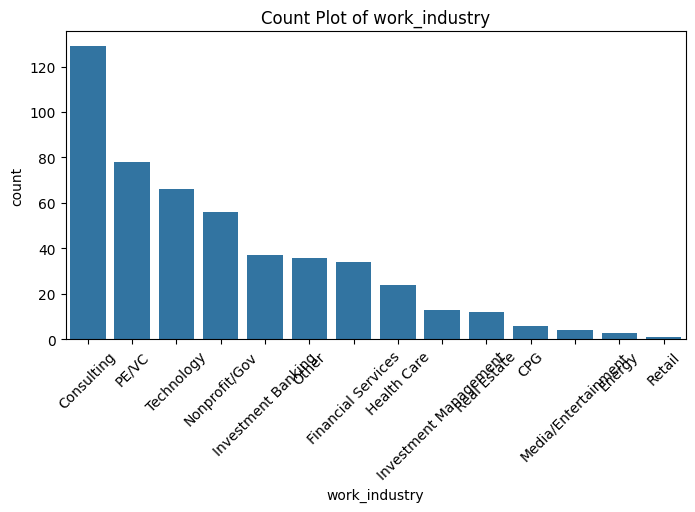

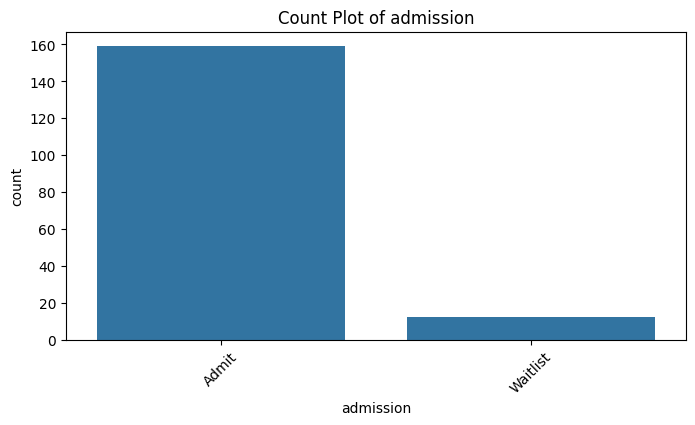

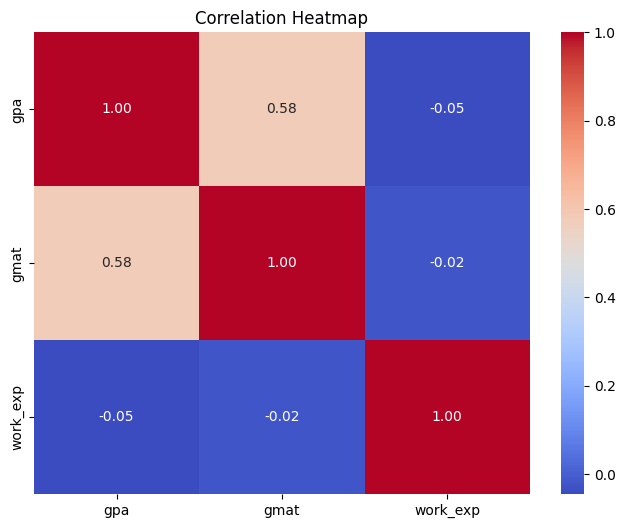

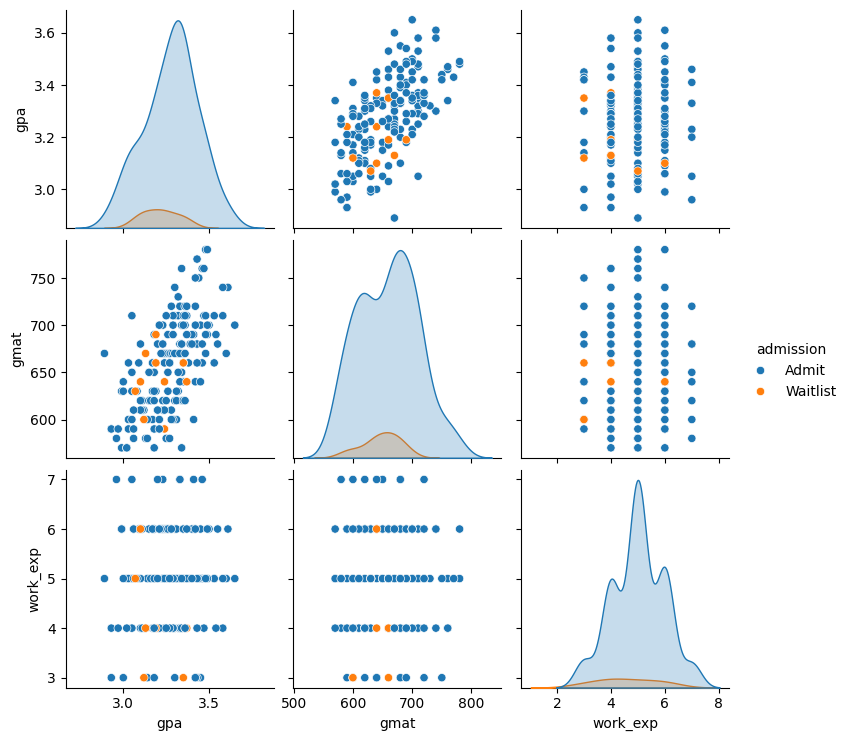

In [46]:
# 2. Exploratory Data Analysis (EDA)
# Display the first few rows of the dataset
print("\nDataset Preview:\n", data.head())

# Summary statistics
print("\nSummary Statistics:\n", data.describe(include='all'))

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Data types
print("\nData Types:\n", data.dtypes)

# Visualize distributions of numerical features
num_cols = ['gpa', 'gmat', 'work_exp']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=15)
    plt.title(f"Distribution of {col}")
    plt.show()

# Visualize categorical features
cat_cols = ['gender', 'international', 'major', 'race', 'work_industry', 'admission']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for numerical features grouped by admission
sns.pairplot(data, vars=num_cols, hue='admission', diag_kind='kde')
plt.show()

# Encode categorical variables
label_encoders = {}
for col in cat_cols:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))
        label_encoders[col] = le

# Define features and target
X = data.drop('admission', axis=1)
y = data['admission']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Gini Index Decision Tree Metrics:
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88


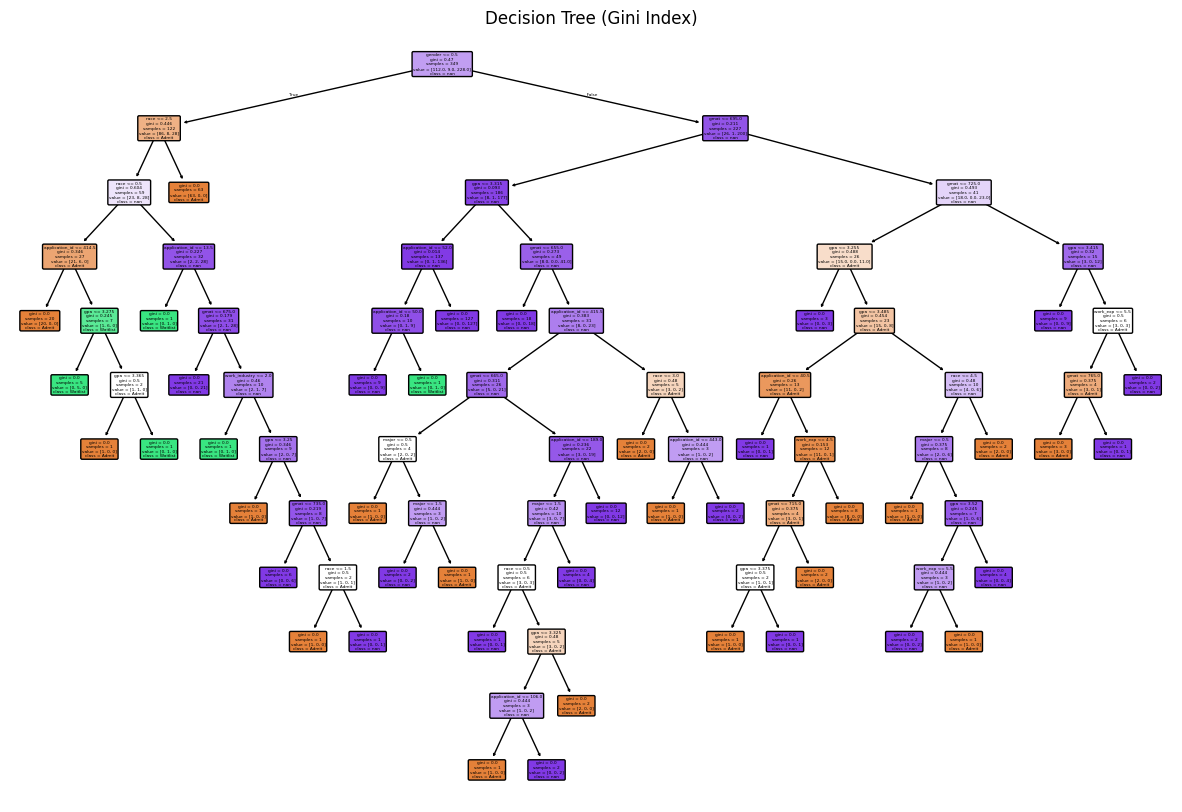

In [47]:
# 3. Decision Tree Classifier with Criterion Gini-inde

# Train the Decision Tree Classifier with Gini index

clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

# Predict on the test set
y_pred_gini = clf_gini.predict(X_test)

# Evaluate the model
accuracy_gini = accuracy_score(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini, average='weighted')
recall_gini = recall_score(y_test, y_pred_gini, average='weighted')
f1_gini = f1_score(y_test, y_pred_gini, average='weighted')

print("\nGini Index Decision Tree Metrics:")
print(f"Accuracy: {accuracy_gini:.2f}")
print(f"Precision: {precision_gini:.2f}")
print(f"Recall: {recall_gini:.2f}")
print(f"F1 Score: {f1_gini:.2f}")

# Dynamically determine class names
if 'admission' in label_encoders:
    class_names = label_encoders['admission'].inverse_transform(np.unique(y))
else:
    class_names = ['Class 0', 'Class 1', 'Class 2']  # Fallback if no label encoder is available

# Visualize the Gini Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf_gini, feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
plt.title("Decision Tree (Gini Index)")
plt.show()




Entropy Decision Tree Metrics:
Accuracy: 0.88
Precision: 0.89
Recall: 0.88
F1 Score: 0.89


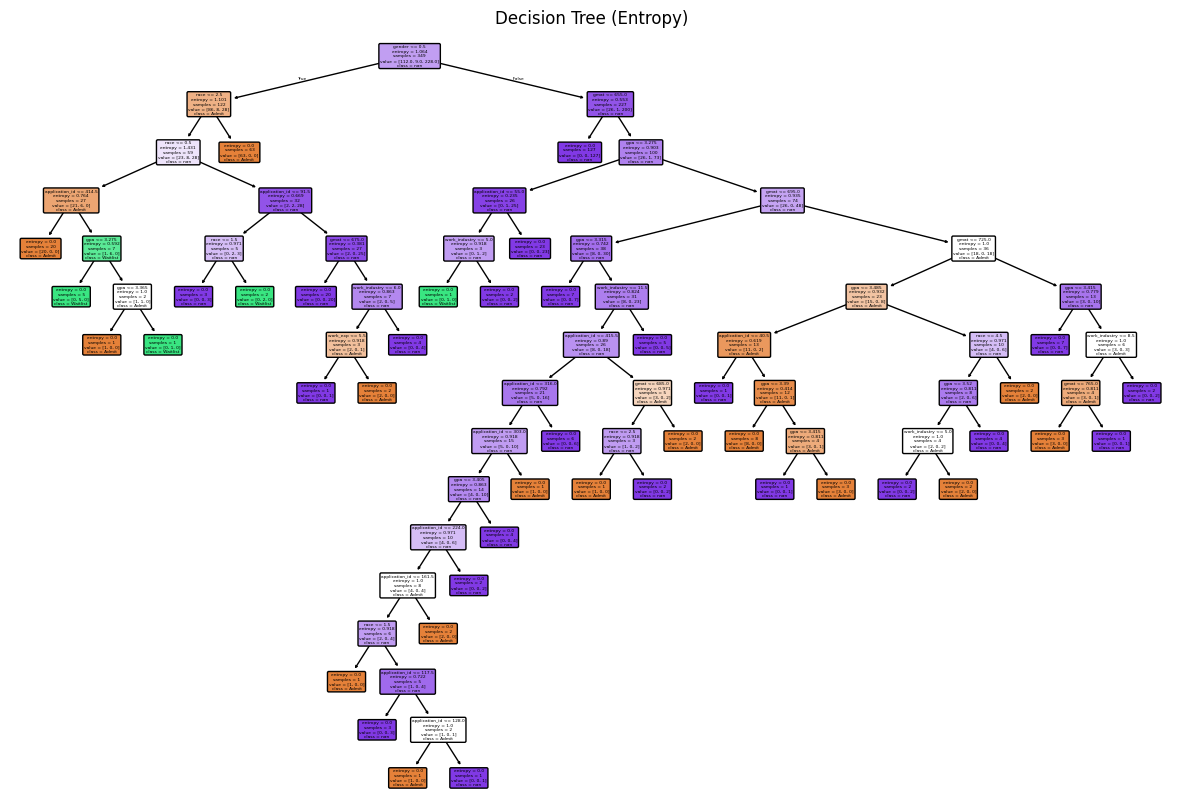

In [48]:
# 4. Decision Tree Classifier with Criterion Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

# Predict on the test set
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluate the model
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy, average='weighted')
recall_entropy = recall_score(y_test, y_pred_entropy, average='weighted')
f1_entropy = f1_score(y_test, y_pred_entropy, average='weighted')

print("\nEntropy Decision Tree Metrics:")
print(f"Accuracy: {accuracy_entropy:.2f}")
print(f"Precision: {precision_entropy:.2f}")
print(f"Recall: {recall_entropy:.2f}")
print(f"F1 Score: {f1_entropy:.2f}")

# Dynamically determine class names for entropy classifier
if 'admission' in label_encoders:
	class_names_entropy = label_encoders['admission'].inverse_transform(np.unique(y))
else:
	class_names_entropy = ['Class 0', 'Class 1', 'Class 2']  # Fallback if no label encoder is available

# Visualize the Entropy Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf_entropy, feature_names=X.columns, class_names=class_names_entropy, filled=True, rounded=True)
plt.title("Decision Tree (Entropy)")
plt.show()

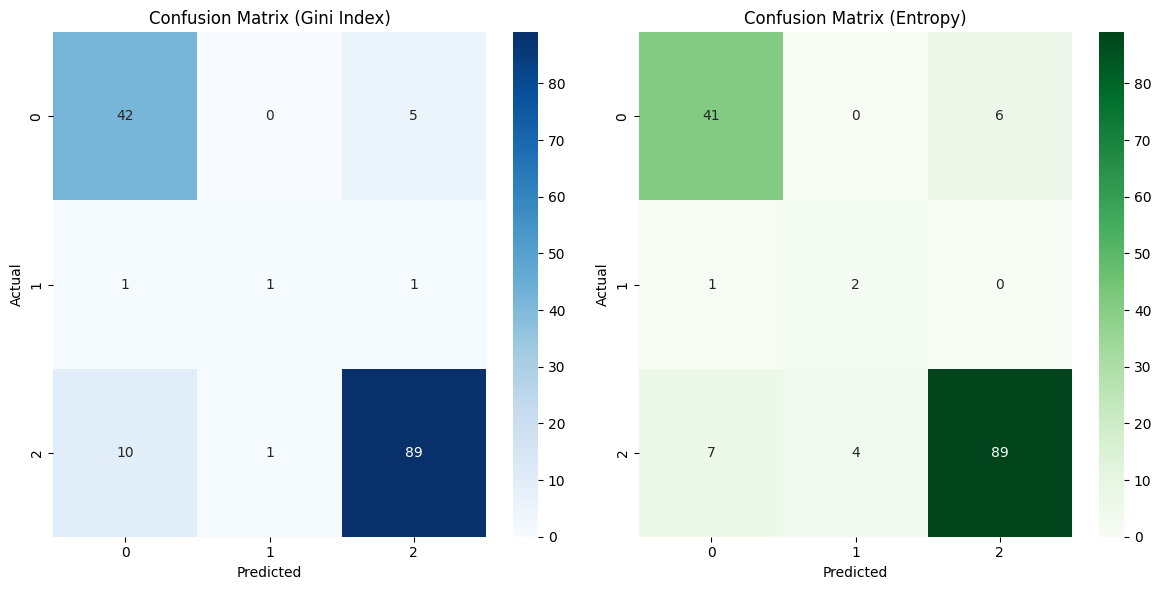

In [ ]:
# 5. Confusion Matrix Visualization
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(conf_matrix_gini, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix (Gini Index)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
sns.heatmap(conf_matrix_entropy, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Confusion Matrix (Entropy)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
plt.tight_layout()

plt.show()


In [50]:
# 5. Analysis of Precision and Recall
print("\nPrecision and Recall Analysis:")
print(f"Gini - Precision: {precision_gini:.2f}, Recall: {recall_gini:.2f}")
print(f"Entropy - Precision: {precision_entropy:.2f}, Recall: {recall_entropy:.2f}")


Precision and Recall Analysis:
Gini - Precision: 0.88, Recall: 0.88
Entropy - Precision: 0.89, Recall: 0.88


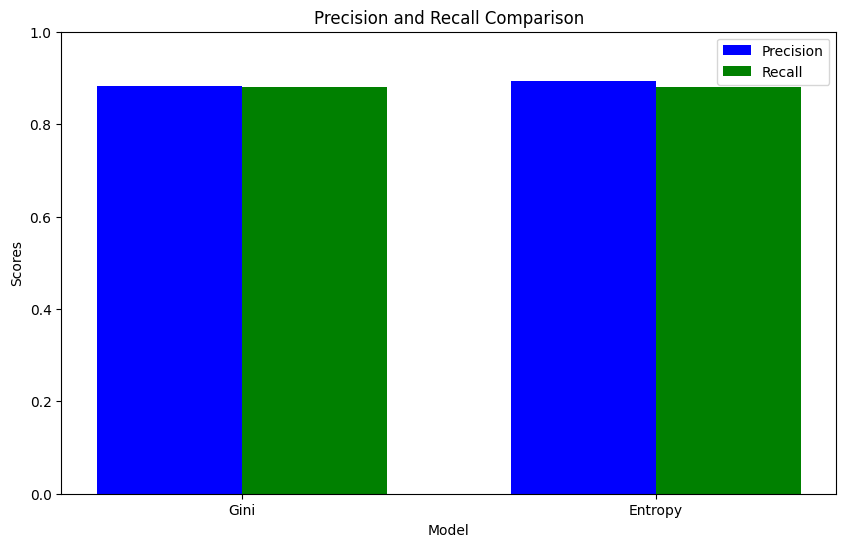

In [51]:
# Visualize Precision and Recall
metrics = {
    'Gini': {'Precision': precision_gini, 'Recall': recall_gini},
    'Entropy': {'Precision': precision_entropy, 'Recall': recall_entropy}
}

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(metrics))

precision_values = [metrics[model]['Precision'] for model in metrics]
recall_values = [metrics[model]['Recall'] for model in metrics]

bar1 = ax.bar(index, precision_values, bar_width, label='Precision', color='b')
bar2 = ax.bar(index + bar_width, recall_values, bar_width, label='Recall', color='g')

ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics.keys())
ax.legend()

plt.ylim(0, 1)
plt.show()

In [52]:
# F1 Score Analysis
print("\nF1 Score Analysis:")
print(f"Gini - F1 Score: {f1_gini:.2f}")
print(f"Entropy - F1 Score: {f1_entropy:.2f}")


F1 Score Analysis:
Gini - F1 Score: 0.88
Entropy - F1 Score: 0.89


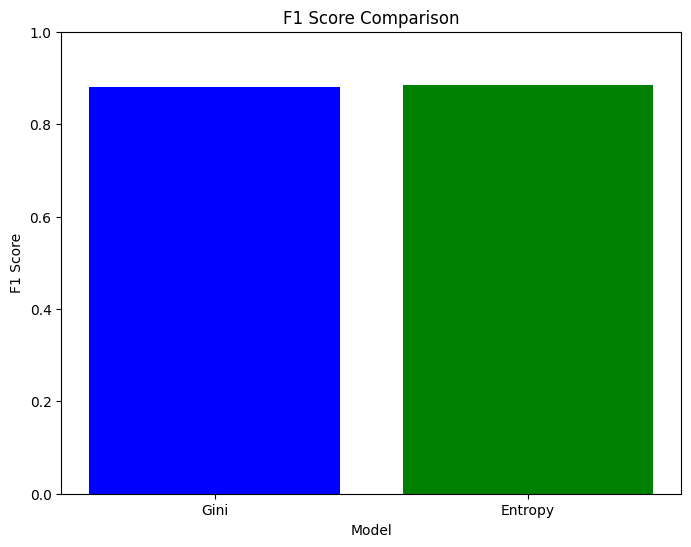

In [53]:
# Visualize F1 Scores
f1_scores = {
    'Gini': f1_gini,
    'Entropy': f1_entropy
}

plt.figure(figsize=(8, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.ylim(0, 1)
plt.show()

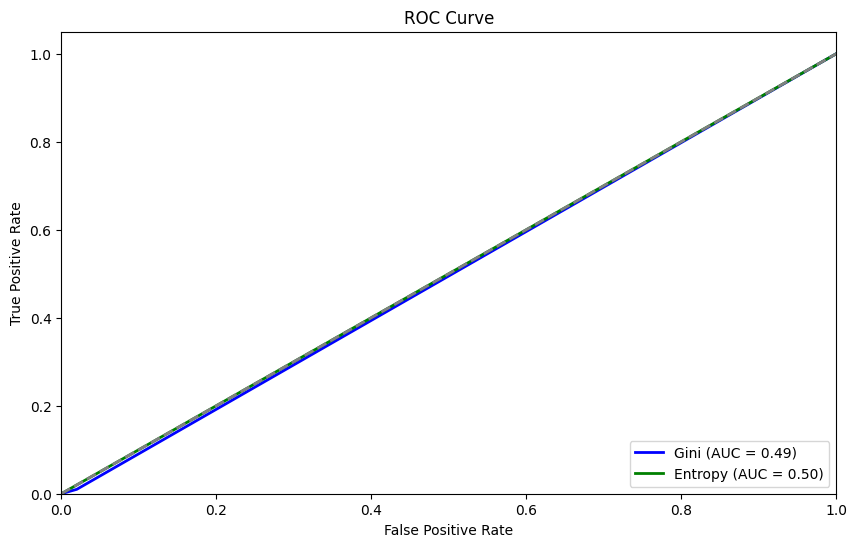

In [54]:
# 10. ROC Curve
fpr_gini, tpr_gini, _ = roc_curve(y_test, clf_gini.predict_proba(X_test)[:, 1], pos_label=2)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, clf_entropy.predict_proba(X_test)[:, 1], pos_label=2)

roc_auc_gini = auc(fpr_gini, tpr_gini)
roc_auc_entropy = auc(fpr_entropy, tpr_entropy)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gini, tpr_gini, color='blue', lw=2, label=f'Gini (AUC = {roc_auc_gini:.2f})')
plt.plot(fpr_entropy, tpr_entropy, color='green', lw=2, label=f'Entropy (AUC = {roc_auc_entropy:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])    
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [55]:
# 11. Comparative Analysis
print("\nComparative Analysis of Models:")
print(f"Gini - Accuracy: {accuracy_gini:.2f}, Precision: {precision_gini:.2f}, Recall: {recall_gini:.2f}, F1: {f1_gini:.2f}, AUC: {roc_auc_gini:.2f}")
print(f"Entropy - Accuracy: {accuracy_entropy:.2f}, Precision: {precision_entropy:.2f}, Recall: {recall_entropy:.2f}, F1: {f1_entropy:.2f}, AUC: {roc_auc_entropy:.2f}")

# Create a summary table
summary_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'Gini': [accuracy_gini, precision_gini, recall_gini, f1_gini, roc_auc_gini],
    'Entropy': [accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, roc_auc_entropy]
})

print("\nSummary Table:")
print(summary_table)


Comparative Analysis of Models:
Gini - Accuracy: 0.88, Precision: 0.88, Recall: 0.88, F1: 0.88, AUC: 0.49
Entropy - Accuracy: 0.88, Precision: 0.89, Recall: 0.88, F1: 0.89, AUC: 0.50

Summary Table:
      Metric      Gini   Entropy
0   Accuracy  0.880000  0.880000
1  Precision  0.882863  0.893405
2     Recall  0.880000  0.880000
3   F1 Score  0.879747  0.885075
4        AUC  0.495000  0.500000


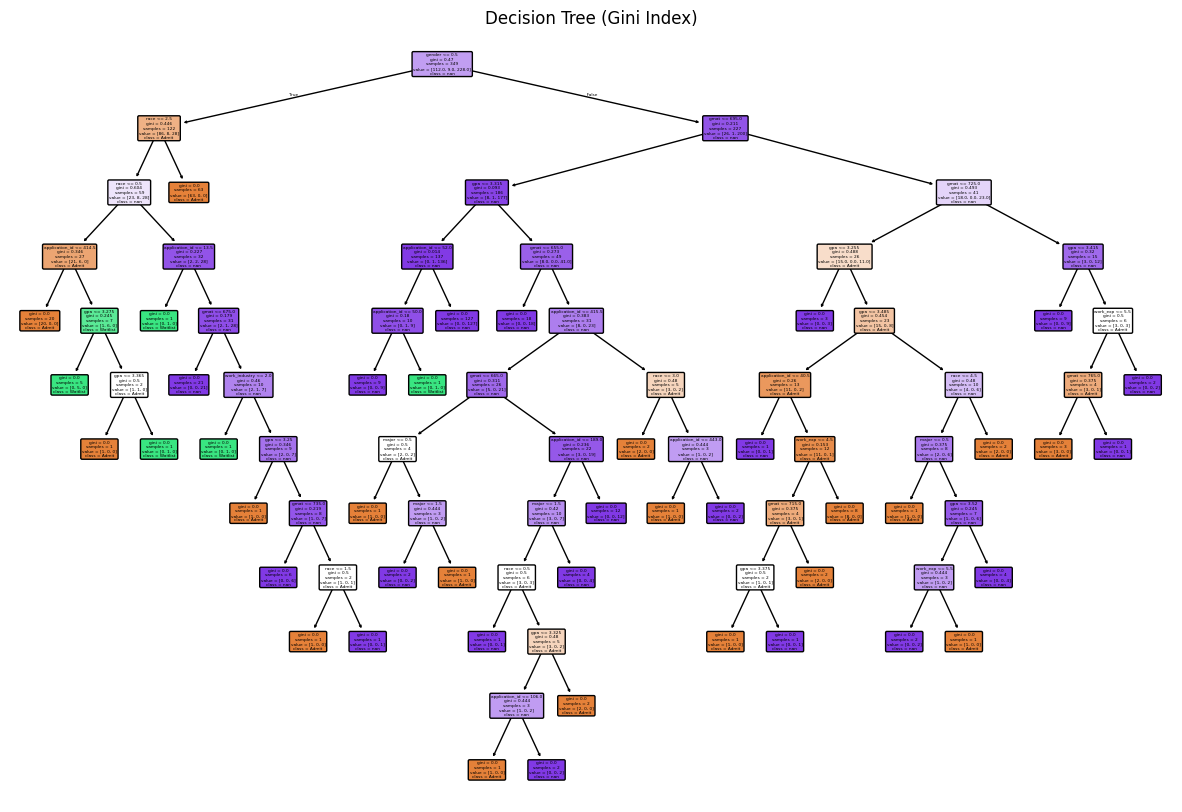

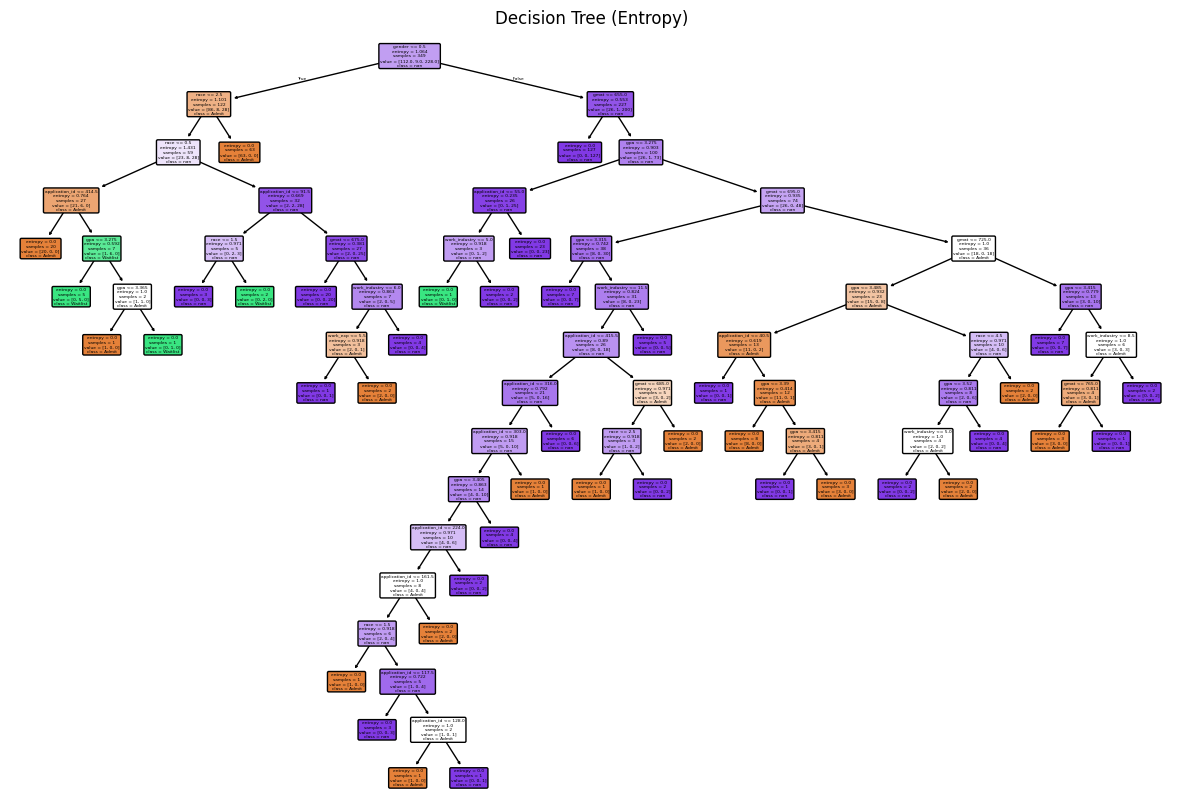

In [56]:
# Visualize the Gini Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf_gini, feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
plt.title("Decision Tree (Gini Index)")
plt.show()

# Visualize the Entropy Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf_entropy, feature_names=X.columns, class_names=class_names_entropy, filled=True, rounded=True)
plt.title("Decision Tree (Entropy)")
plt.show()

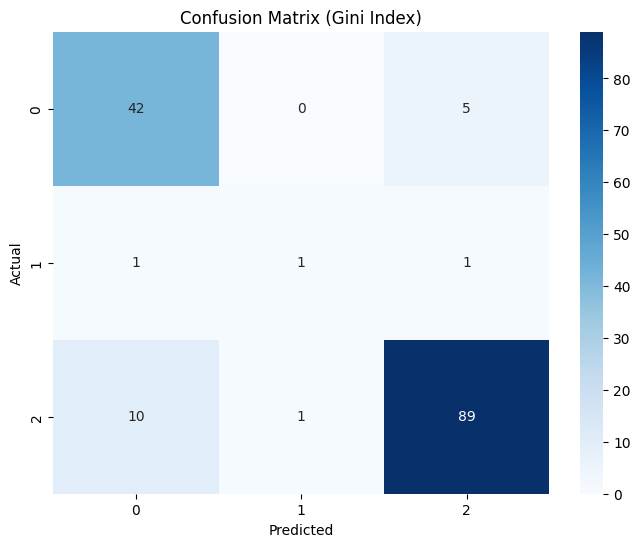

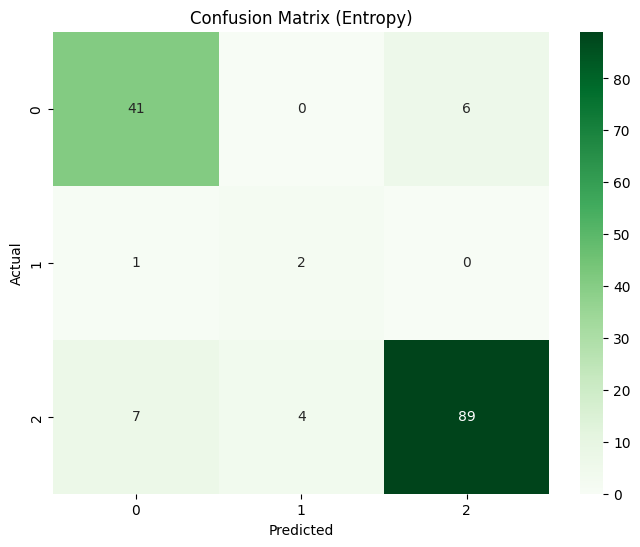

In [57]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Gini Decision Tree
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gini, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Gini Index)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion matrix for Entropy Decision Tree
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_entropy, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Entropy)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [58]:
# Results and Conclusion
print("Results and Conclusion:")

# Display the summary table
print("\nSummary Table:")
print(summary_table)

# Conclusion based on the metrics
print("\nConclusion:")
if accuracy_gini > accuracy_entropy:
    print("The Decision Tree with Gini Index has a higher accuracy.")
elif accuracy_gini < accuracy_entropy:
    print("The Decision Tree with Entropy has a higher accuracy.")
else:
    print("Both Decision Trees have the same accuracy.")

if precision_gini > precision_entropy:
    print("The Decision Tree with Gini Index has a higher precision.")
elif precision_gini < precision_entropy:
    print("The Decision Tree with Entropy has a higher precision.")
else:
    print("Both Decision Trees have the same precision.")

if recall_gini > recall_entropy:
    print("The Decision Tree with Gini Index has a higher recall.")
elif recall_gini < recall_entropy:
    print("The Decision Tree with Entropy has a higher recall.")
else:
    print("Both Decision Trees have the same recall.")

if f1_gini > f1_entropy:
    print("The Decision Tree with Gini Index has a higher F1 Score.")
elif f1_gini < f1_entropy:
    print("The Decision Tree with Entropy has a higher F1 Score.")
else:
    print("Both Decision Trees have the same F1 Score.")

if roc_auc_gini > roc_auc_entropy:
    print("The Decision Tree with Gini Index has a higher AUC.")
elif roc_auc_gini < roc_auc_entropy:
    print("The Decision Tree with Entropy has a higher AUC.")
else:
    print("Both Decision Trees have the same AUC.")

Results and Conclusion:

Summary Table:
      Metric      Gini   Entropy
0   Accuracy  0.880000  0.880000
1  Precision  0.882863  0.893405
2     Recall  0.880000  0.880000
3   F1 Score  0.879747  0.885075
4        AUC  0.495000  0.500000

Conclusion:
Both Decision Trees have the same accuracy.
The Decision Tree with Entropy has a higher precision.
Both Decision Trees have the same recall.
The Decision Tree with Entropy has a higher F1 Score.
The Decision Tree with Entropy has a higher AUC.
